# **Prediction using Supervised Learning** 
This time we will look at the implementation of supervised learning to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

## **Simple Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. This is a simple linear regression task as it involves just two variables.


### Author : Ishardina Cholifatul Hidayati

In [ ]:
# importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("the first ten records")
data.head(10)

the first ten records


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
# Detect missing value
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Because there are no missing values, we can move on to the next step. We'll calculate the correlation of the two variables and plot our data onto a 2-D plane to make it easier to see the relationship between them.

In [ ]:
# calculate the correlation
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


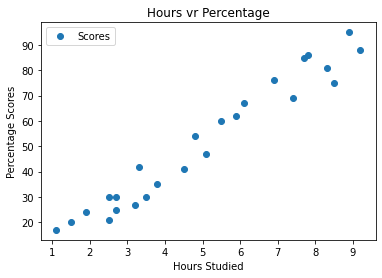

In [ ]:
# plotting the data
data.plot(x= 'Hours', y= 'Scores', style = 'o')
plt.title('Hours vr Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

The correlation value obtained is close to one and increasingly clear from the graph above that there is a **positive linear relation** between the number of hours studied and the percentage of score.

### **Preparing the Data**


The next step, we will separate the features (input) and labels (output) of the data. Because we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied, the input used is the value in the 'Hours' column while the output is value in the 'Scores' column.

In [ ]:
X = data[['Hours']].values
y = data[['Scores']].values 

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 17)

### **Training the Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

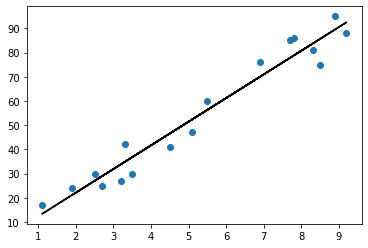

In [ ]:
# plotting thr regression line
line = model.coef_*X_train+model.intercept_

# plotting for the train data
plt.scatter(X_train, y_train)
plt.plot(X_train, line, color='k')
plt.show()

### **Making Predictions**
After conducting training data, we get a regression model from the data we use. Furthermore, with the same model we apply the untrained data.

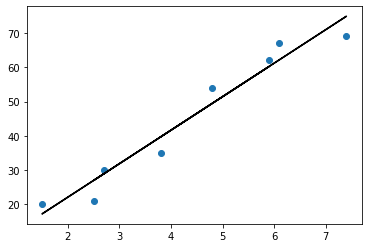

In [ ]:
y_pred = model.predict(X_test)

# plotting for the test data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='k')
plt.show()

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df  

,Actual,Predicted
0,30,28.948922
1,21,26.994254
2,67,62.178280
3,69,74.883623
4,20,17.220913
5,62,60.223612
6,54,49.472937
7,35,39.699597


In [ ]:
# test with other data
hours = [[9.25]]
prediction = model.predict(hours)
print('From the model, if we study {}'.format(hours), ' hours, we will get score approx {}'.format(prediction))

From the model, if we study [[9.25]]  hours, we will get score approx [[92.96430314]]


### **Evaluating the Model**
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 3.9416011054125395
